In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
df = pd.read_csv("/content/Advertising.csv")

In [6]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.drop(columns="Unnamed: 0",inplace=True)

In [8]:
X=df.drop(['sales'],axis=1)
y=df['sales']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=74)
X_train.shape,X_test.shape

((140, 3), (60, 3))

In [10]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
lr.coef_

array([0.04374582, 0.18731434, 0.00100718])

In [12]:
lr.intercept_

np.float64(3.2230679649943763)

In [13]:
X_test[:5]

,TV,radio,newspaper
176,248.4,30.2,20.3
136,25.6,39.0,9.3
46,89.7,9.9,35.7
122,224.0,2.4,15.6
101,296.4,36.3,100.9


In [14]:
y_pred=lr.predict(X_test)

In [15]:
y_pred

array([19.76686723, 11.65758684,  9.03743574, 13.48739696, 23.09046221,
        6.73000593, 16.44625008, 10.59626753, 13.80774631, 20.65857749,
        6.82876666, 21.10868526, 20.95765544, 15.26742823, 19.44004441,
       10.68010033, 20.6513587 ,  9.63134716,  9.72556768, 12.04319116,
       14.19053096, 14.47090751, 19.1588522 , 18.19107596, 18.39069808,
       13.72759148, 14.69375609, 13.15955714,  9.41699132, 23.9311963 ,
       23.00698868, 10.04417411, 19.38771821, 20.7591739 ,  6.74074837,
       16.97714543, 20.07354107, 19.08098573, 12.23805043, 18.36056075,
       19.1260283 , 14.97534555,  9.2112097 , 15.41097834, 12.16511017,
       11.58900116, 13.79626578, 16.17194185, 18.77054781, 14.38186443,
       10.9053246 , 10.35234218, 14.14832582, 18.40370253, 10.56903949,
       15.78222811, 12.13369281, 21.77344763, 12.57663394, 13.8471993 ])

Evaluation of Linear Regression

In [16]:
#Mean Absolute Error
#Mean Squared error
#Root mean Squared error
#R2 Score

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#pip install --upgrade scikit-learn

print(f"MSE is {mean_squared_error(y_test,y_pred)}")
print(f"MAE is {mean_absolute_error(y_test,y_pred)}")
#print(f"RMSE is {mean_squared_error(y_test,y_pred,squared=False)}")

MSE is 3.4308745745191027
MAE is 1.2796162537626092


**R2 Score**
h**ow variance can be explained by future**


In [18]:
from sklearn.metrics import r2_score
print(f"R2-score is {r2_score(y_test,y_pred)}")

R2-score is 0.876736078577098


# **Regularization**
**Assumptions of Linear Regression**

**Types of Regularization 1) LAsso [L1]**

In [19]:
from sklearn.linear_model import Lasso
las =Lasso()
las.fit(X_train,y_train)
y_pred=las.predict(X_test)
print(f"R2 score {r2_score(y_test, y_pred)}")

R2 score 0.8762512260170696


**Second Type of Regularisation**

# ** Ridge Regression**

In [21]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

print(f"R2 score {r2_score(y_test, y_pred)}")

R2 score 0.876735674217193


**Third Regularisation Type**
# 3) ElasticNet()

In [22]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train,y_train)
y_pred=elasticnet.predict(X_test)
print(f"R2 score {r2_score(y_test, y_pred)}")

R2 score 0.8765391027131748


# **Assumptions of Linear Regression**
There is Linear relationship between features and target

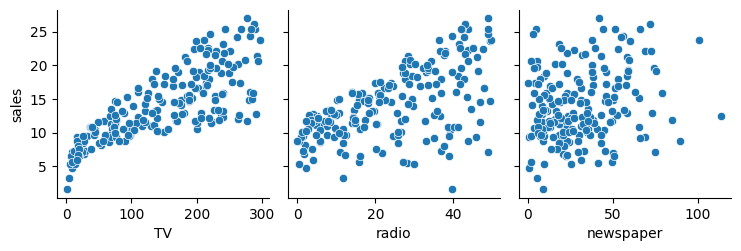

In [24]:
## TO check wether the features and target are in linear relagtionship we can use pair plot\
import seaborn as sns
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars=['sales'])
plt.show()

In [25]:
corr=df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [27]:
#mean residuals= 0
residual= (y_test-y_pred)
np.mean(residual)

np.float64(-0.05653033817411228)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
def vif_score(X):
  X_arr=X.values
  vif=[variance_inflation_factor(X_arr,i) for i in range(X.shape[1])]
  vif_score=pd.DataFrame()
  vif_score['vif_score']=vif
  vif_score['features']=X.columns
  return vif_score

In [35]:
vif_score(X)

,vif_score,features
0,2.486772,TV
1,3.285462,radio
2,3.055245,newspaper
